In [2]:
import cv2
import utils
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
# import

In [3]:
img_path = 'Images'
img_name = 'group'
img_suffix = '.jpg'
# img1 = np.array(Image.open(img_path + '/' + img_name + '_1' + img_suffix).convert('RGB'), 'f') / 255
# img2 = np.array(Image.open(img_path + '/' + img_name + '_2' + img_suffix).convert('RGB'), 'f') / 255
img1 = cv2.imread(img_path + '/' + img_name + '_1' + img_suffix)
img2 = cv2.imread(img_path + '/' + img_name + '_2' + img_suffix)
# i1 = Image.fromarray((np.clip(i1, 0, 1) * 255).astype(np.uint8))
# i2 = Image.fromarray((np.clip(i2, 0, 1) * 255).astype(np.uint8))
# i1.save('Images/group_1.jpg')
# i2.save('Images/group_2.jpg')

In [4]:
# cv2.imshow('img1', img1)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [4]:
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

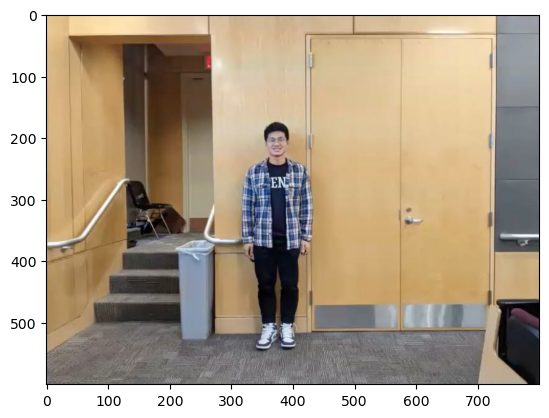

In [5]:
plt.imshow(img1)

In [6]:
img_gray1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
img_gray2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
flow = cv2.calcOpticalFlowFarneback(img_gray1, img_gray2, None, 0.5, 3, 15, 3, 5, 1.2, 0)
# mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
# hsv = np.zeros_like(img1)
# hsv[...,1] = 255
# hsv[...,0] = ang*180/np.pi/2
# hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
# rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2RGB)
# plt.imshow(rgb)

In [7]:
MIN_MATCH_COUNT = 10
img_gray1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
img_gray2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
# Initiate SIFT detector
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img_gray1,None)
kp2, des2 = sift.detectAndCompute(img_gray2,None)
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)
# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w = img_gray1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)
    img_gray2 = cv2.polylines(img_gray2,[np.int32(dst)],True,255,3, cv2.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None

# draw_params = dict(matchColor = (0,255,0), # draw matches in green color
#                    singlePointColor = None,
#                    matchesMask = matchesMask, # draw only inliers
#                    flags = 2)
# img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
# plt.imshow(img3),plt.show()

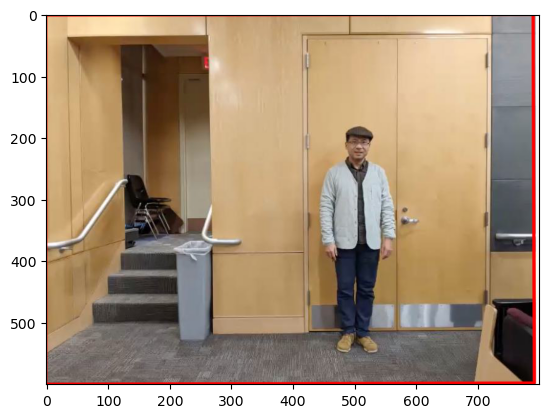

In [8]:
plt.imshow(cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA))

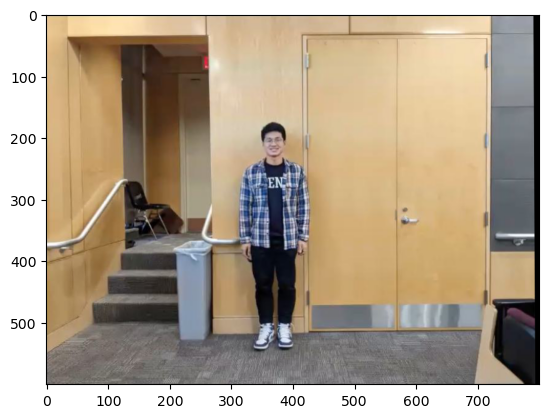

In [50]:
new1 = cv2.warpPerspective(img1, M, (img1.shape[1], img1.shape[0]))
plt.imshow(new1)

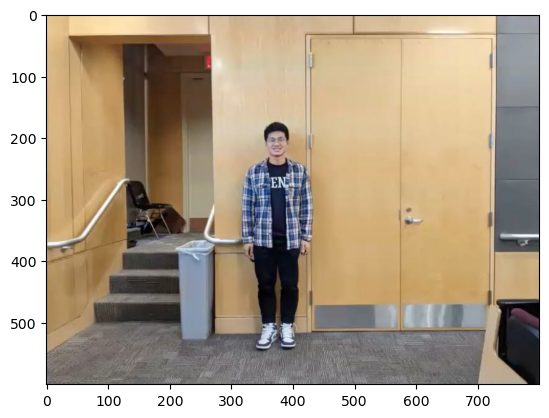

In [51]:
plt.imshow(img1)

In [56]:
sum(mask)

array([124], dtype=uint8)

In [12]:
# Reading the Image
image = cv2.imread('1.jpg')

# initialize the HOG descriptor
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# detect humans in input image
(humans, _) = hog.detectMultiScale(image, winStride=(10, 10),
                                   padding=(32, 32), scale=1.1)

# Initialize an empty list to store bounding box coordinates
bounding_boxes = []

# loop over all detected humans
for (x, y, w, h) in humans:
    pad_w, pad_h = int(0.15 * w), int(0.01 * h)
    # Store the bounding box coordinates
    bounding_box = (x + pad_w, y + pad_h, x + w - pad_w, y + h - pad_h)
    bounding_boxes.append(bounding_box)
    cv2.rectangle(image, (bounding_box[0], bounding_box[1]), (bounding_box[2], bounding_box[3]), (0, 255, 0), 2)

# Print the bounding boxes
print("Bounding boxes:", bounding_boxes)

[ WARN:0@1930.319] global /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_f6tvh9615u/croot/opencv-suite_1691620375715/work/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('1.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.6.0) /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_f6tvh9615u/croot/opencv-suite_1691620375715/work/modules/core/src/matrix.cpp:246: error: (-215:Assertion failed) s >= 0 in function 'setSize'
